# Individual Assignments

## Data and Questions

### Data
The processed_cleveland dataset contain processed angiography data on patients in various clinics in 1988, applying a model derived from test results of 303 patients undergoing angiography at the Cleveland Clinic in Cleveland, Ohio to estimate probabilities of angiographic coronary disease. This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. The dataset obtained contains the following 14 attributes out of 76 attributes from the initial dataset for each patient: age, sex, chest pain type, resting blood pressure, serum cholesterol, presence of high blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina, ST depression induced by exercise relative to rest slope of the peak exercise ST segment, number of major vessels (0-3) coloured by fluoroscopy, presence of defect, diagnosis of heart disease. 

### Questions
The project is going find the relationship between serum cholestoral and age due to different sexs of patients of cleveland in the dataset. The variable of interest (response) is serum cholestoral (chol), and explanatary variables are age and sex. The result may be different between analysises include and exclude sex, so model contain sex as explanatary variable and model without sex as explanatary variable will be compared at last. The question will be focused on prediction. After analyzing, I will try to use the model get from processed cleveland dataset to predict the serum cholestoral due to age and sex in other areas.

## Exploratory Data Analysis and Visualization

### Sources
**Link to dataset package:** https://archive.ics.uci.edu/dataset/45/heart+disease

**Introductory paper for dataset package:** https://pubmed.ncbi.nlm.nih.gov/2756873/

In [35]:
library(tidyverse)
library(repr)
library(ggplot2)
library(cowplot)
library(moderndive)
library(broom)
library(infer)
library(GGally)
library(leaps)

**Read the data and rename columns.**

In [37]:
cleveland <- read_csv("data/processed.cleveland.data", col_name = FALSE)
colnames(cleveland) <- c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num")

head(cleveland)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,0


In [3]:
cleveland_clean <- cleveland |>
                    select(age, sex, chol)
cleveland_clean$sex <- if_else(cleveland_clean$sex == "1", "male", "female")
head(cleveland_clean)

age,sex,chol
<dbl>,<chr>,<dbl>
63,male,233
67,male,286
67,male,229
37,male,250
41,female,204
56,male,236


**Visulization of explanatary variable and response variable.**

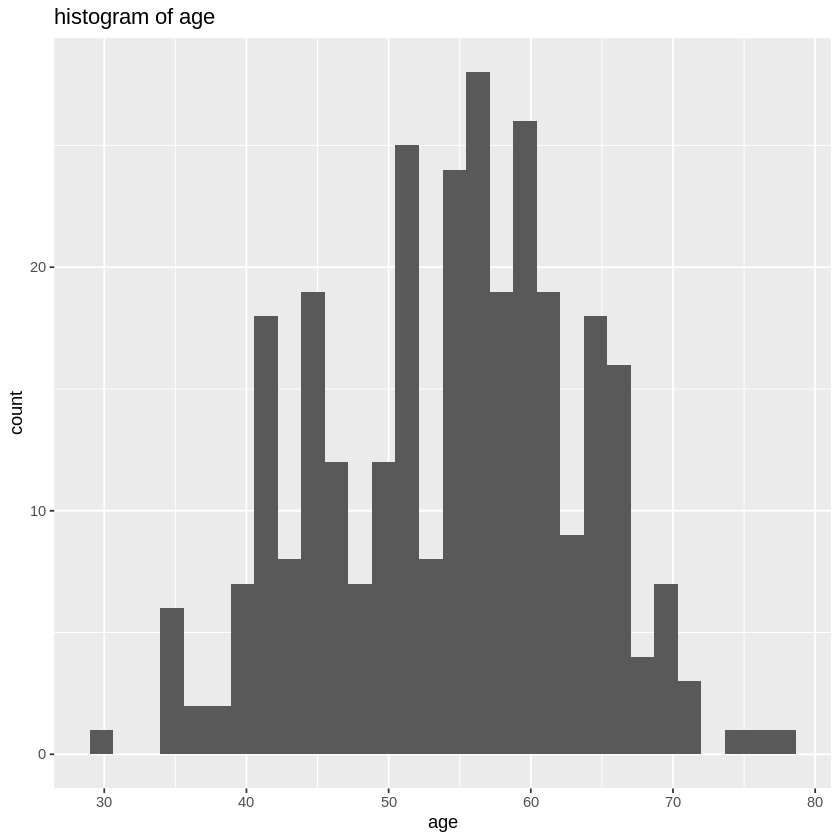

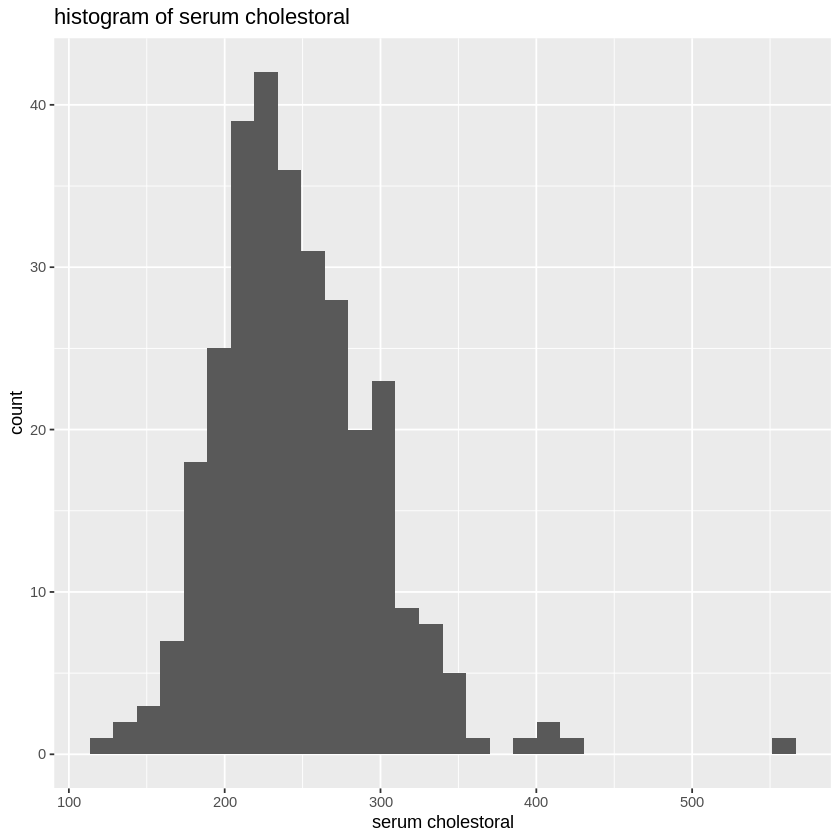

In [4]:
age_hist <- cleveland_clean |>
            ggplot(aes(x = age)) +
            geom_histogram(bins = 30) +
            labs(x = "age", title = "histogram of age")
chol_hist <- cleveland_clean |>
            ggplot(aes(x = chol)) +
            geom_histogram(bins = 30) +
            labs(x = "serum cholestoral", title = "histogram of serum cholestoral")

age_hist
chol_hist

The distribution of age approaches normal (symmetric and bell-shaped), and the distribution of serum cholestoral is right skewed.

**Relationship between age and serum (scatter plot)**

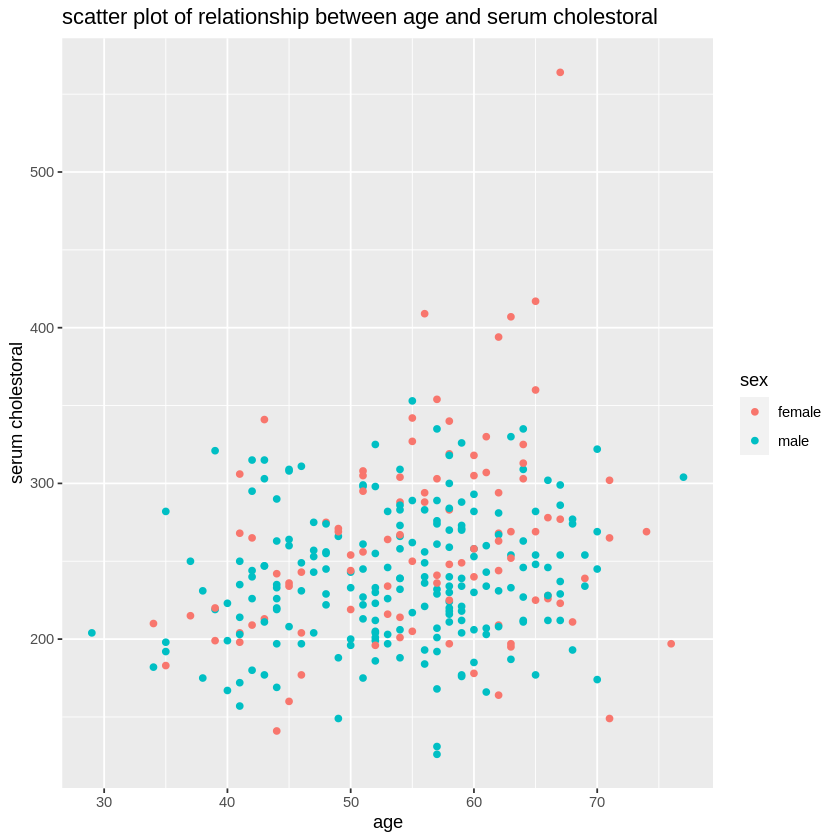

In [5]:
relation_plot <- cleveland_clean |>
                    ggplot(aes(x = age, y = chol, color = sex)) +
                    geom_point() +
                    labs(x = "age", y = "serum cholestoral", 
                         title = "scatter plot of relationship between age and serum cholestoral",
                        color = "sex")

relation_plot

We can see that there is no obvious linear pattern between serum cholestoral and age.

**Correlation between age and serum cholestoral**

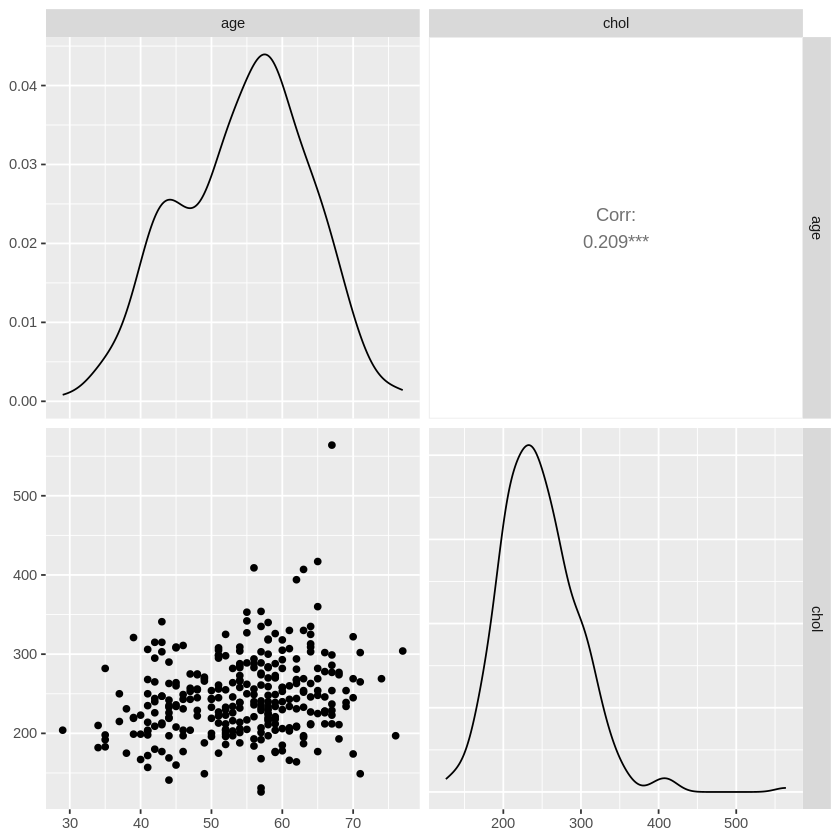

In [6]:
ggpairs(cleveland_clean |> select(-sex))

By using ggpairs, we can see that the correlation between serum cholestoral and age is about 0.209, which means that they have relatively low and positive correlation.

**Get least square line model**

**model1:** chol = $\beta_0$+$\beta_1$age <br />
**model2:** chol = $\beta_0$+$\beta_1$age+$\beta_2$sex <br />
**model3:** chol = $\beta_0$+$\beta_1$age+$\beta_2$sex+$\beta_3$age*sex

In [7]:
reg1 <- lm(chol~age, data = cleveland_clean)
reg2 <- lm(chol~age+sex, data = cleveland_clean)
reg3 <- lm(chol~age*sex, data = cleveland_clean)
tidy(reg1)
tidy(reg2)
tidy(reg3)
summary(reg1)
summary(reg2)
summary(reg3)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),181.532533,17.8176498,10.188354,3.871676e-21
age,1.196947,0.3228902,3.706979,2.496169e-04


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),200.700171,18.5055119,10.845427,2.426905e-23
age,1.095668,0.3194007,3.430386,6.872341e-04
sexmale,-20.083442,6.1779632,-3.250819,1.281693e-03


term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),160.308386,30.6364266,5.232607,3.151254e-07
age,1.820553,0.5422755,3.357246,8.890611e-04
sexmale,40.857160,37.4084456,1.092191,2.756285e-01
age:sexmale,-1.106585,0.6700048,-1.651608,9.966428e-02



Call:
lm(formula = chol ~ age, data = cleveland_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-123.759  -32.600   -5.804   28.628  302.272 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 181.5325    17.8176  10.188  < 2e-16 ***
age           1.1969     0.3229   3.707  0.00025 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.72 on 301 degrees of freedom
Multiple R-squared:  0.04366,	Adjusted R-squared:  0.04048 
F-statistic: 13.74 on 1 and 301 DF,  p-value: 0.0002496



Call:
lm(formula = chol ~ age + sex, data = cleveland_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-129.493  -33.900   -4.452   28.489  289.890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 200.7002    18.5055  10.845  < 2e-16 ***
age           1.0957     0.3194   3.430 0.000687 ***
sexmale     -20.0834     6.1780  -3.251 0.001282 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.93 on 300 degrees of freedom
Multiple R-squared:  0.0762,	Adjusted R-squared:  0.07004 
F-statistic: 12.37 on 2 and 300 DF,  p-value: 6.864e-06



Call:
lm(formula = chol ~ age * sex, data = cleveland_clean)

Residuals:
     Min       1Q   Median       3Q      Max 
-140.568  -32.814   -5.285   28.805  281.715 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 160.3084    30.6364   5.233 3.15e-07 ***
age           1.8206     0.5423   3.357 0.000889 ***
sexmale      40.8572    37.4084   1.092 0.275628    
age:sexmale  -1.1066     0.6700  -1.652 0.099664 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 49.79 on 299 degrees of freedom
Multiple R-squared:  0.08455,	Adjusted R-squared:  0.07537 
F-statistic: 9.206 on 3 and 299 DF,  p-value: 7.645e-06


By comparing the adjusted R-square, we see that there is low correlation between serum cholestoral and age, and model 3 get relatively higher adjusted R-square, which shows that it is the best of these three models.

**Visualiztion the linear model**

Since model 3 is relatively better than others, it will be visualized to show the relation between serum cholestoral and age.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


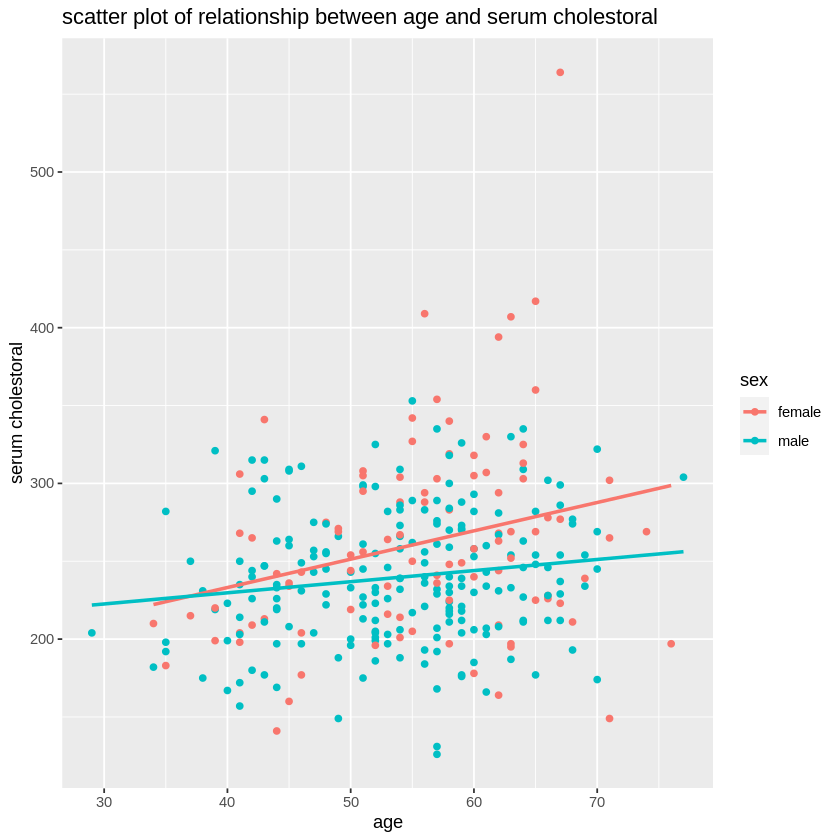

In [8]:
cleveland_clean$pred <- predict(reg3)

relation_plot <- ggplot(cleveland_clean, aes(x = age, y = chol, color = sex)) +
                    geom_point() +
                    geom_line(aes(y = pred), size = 1) +
                    labs(x = "age", y = "serum cholestoral", 
                         title = "scatter plot of relationship between age and serum cholestoral",
                        color = "sex")
relation_plot

Based on the plot, we can see that when age increases, the serum cholestoral is likely to increase as well. By adding sex as a explanatary variable, we can see that the increasement of serum cholestoral of female is faster than the that of male.

**Potential questions** <br />
Since the correlation between serum cholestoral and age is low, there might be no relation between these two variables. The relation between serum cholestoral and age may probably be quite different in models of other areas, which influences the prediction in the future. 

**Plot of model 1 and model 2 (comparison)**

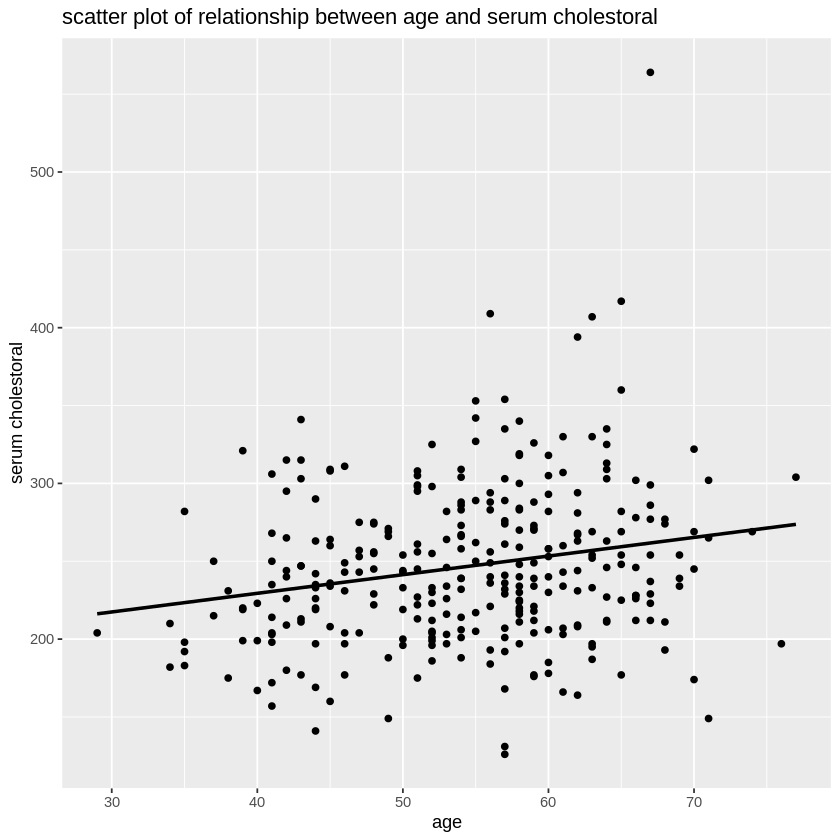

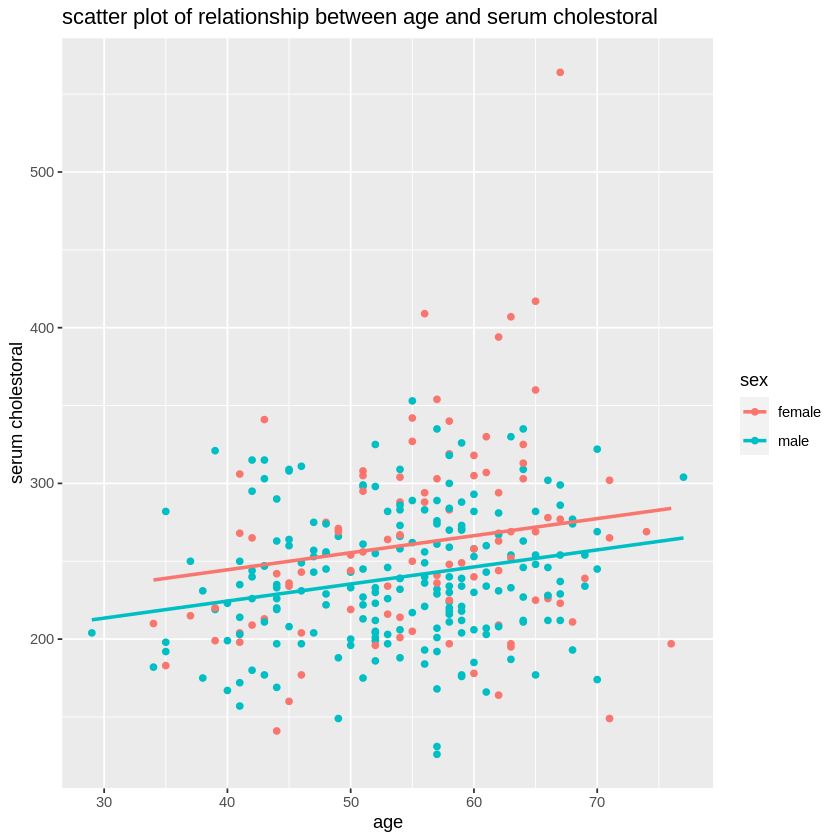

In [9]:
relation_plot1 <- ggplot(cleveland_clean, aes(x = age, y = chol)) +
                    geom_point() +
                    geom_line(aes(y = predict(reg1)), size = 1) +
                    labs(x = "age", y = "serum cholestoral", 
                         title = "scatter plot of relationship between age and serum cholestoral")
relation_plot2 <- ggplot(cleveland_clean, aes(x = age, y = chol, color = sex)) +
                    geom_point() +
                    geom_line(aes(y = predict(reg2)), size = 1) +
                    labs(x = "age", y = "serum cholestoral", 
                         title = "scatter plot of relationship between age and serum cholestoral",
                        color = "sex")
relation_plot1
relation_plot2

## Methods and Plan

In this individual assignment, it is supposed to find the relationship between serum cholestoral and age due to different sexes of patients in cleveland in the dataset, and then use the model produced to predict the serum cholestoral level of patients in other areas by considering their ages and sexes. As above, I propose to use linear regression to build a model of relationship between serum cholestoral level and age of patients in cleveland and try using this linear model to make a prediction of serum cholestoral level of patients in other areas.

**Why is this method appropraite**<br />
To begin with, by the definition of linear regression analysis, linear regression is used to predict the value of continuous response variable based on the values of other continuous explantory variables. In this individual assignment, response variable serum cholestoral and explanatory variable age are both continuous, matches the requirement of linear regression. Futhermore, linear regression is used to make predictions, prefectly suits the need that I will use the model to predict serum cholestoral level of patients in other areas. <br />
Secondly, by calculating the correlation between serum cholestoral level and age in the second part explortory data analysis and visualization, there is positive correlation between serum cholestoral level and age, which means that linear regression can be used in this individual assignment. The correlation coefficient not only show the positive correlation between serum cholestoral level and age, but also show the strength of correlation of these two variables. <br />
At last, linear regression model is simple to build, and provides mathematical formula that can generate predictions with easy understanding interpretation. As well, linear regression model can be trained easily and quickly, and there is not many requirements for the dataset to build a linear regression model.

**Which assumptions are required, if any, to apply the method selected**<br />
For linear regression model, the response and explanatory variables should be numerically continous. Since serum cholestoral level and age are both continuous, linear regression can be applyed to visualize the relationship between these two varibles. Since one of advantages of linear regression is that there are not much requirements for building a linear model. 

**What are potential limitations or weaknesses of the method selected?**<br />
At first, the correlation between serum cholestoral level and sex is not strong enough, it may not be very appropriate to use linear regression to build a model between serum cholestoral and sex and then make predictions of serum cholestoral level of patients in other areas. As above, linear regression may not provide the best prediction in the future study. <br />
Furthermore, linear regression is sentive to outliers. The slope and intercept of linear regression are both prone to outliers. Since the dataset are not processed to remove any anormal variables, the final prediction by the linear regression model may possibly influenced by these outliers.<br />
Fianlly, the relationship between serum cholestoral level and age may not be linear. There may be quadratic relation between serum cholestoral level and sex for example. Linear regression model cannot perform well when the relation between response varible and expanatory variable are not linear.

## Implementation of a Proposed Model

**Read data in other area** <br />
Read and clean the data in Hungarian, filter out unknown values in the dataset.

In [18]:
hungarian <- read_csv("data/processed.hungarian.data", col_name = FALSE)
colnames(hungarian) <- c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num")

hungarian_clean <- hungarian |>
                    select(age, sex, chol)
hungarian_clean$sex <- if_else(hungarian_clean$sex == "1", "male", "female")
hungarian_clean$chol <- as.numeric(hungarian_clean$chol)
hungarian_clean <- filter(hungarian_clean, chol != "?")


Rows: 294 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): X4, X5, X6, X7, X8, X9, X11, X12, X13
dbl (5): X1, X2, X3, X10, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


**Parameter selection and comparision** <br />
Using function "regsubsets()", we can find best number of parameters to build a regression model to predict serum cholestoral level by comparing the value of mallow's cp. In general, with smaller mallow's cp value, better the model fit.

In [38]:
cleveland$sex <- if_else(cleveland$sex == "1", "male", "female")
cleveland$ca <- as.double(cleveland$ca)
cleveland$thal <- as.double(cleveland$thal)

cleveland_sel <- regsubsets(chol~.,data = cleveland, method = "forward")
summary(cleveland_sel)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


Subset selection object
Call: regsubsets.formula(chol ~ ., data = cleveland, method = "forward")
13 Variables  (and intercept)
         Forced in Forced out
age          FALSE      FALSE
sexmale      FALSE      FALSE
cp           FALSE      FALSE
trestbps     FALSE      FALSE
fbs          FALSE      FALSE
restecg      FALSE      FALSE
thalach      FALSE      FALSE
exang        FALSE      FALSE
oldpeak      FALSE      FALSE
slope        FALSE      FALSE
ca           FALSE      FALSE
thal         FALSE      FALSE
num          FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         age sexmale cp  trestbps fbs restecg thalach exang oldpeak slope ca 
1  ( 1 ) "*" " "     " " " "      " " " "     " "     " "   " "     " "   " "
2  ( 1 ) "*" "*"     " " " "      " " " "     " "     " "   " "     " "   " "
3  ( 1 ) "*" "*"     " " " "      " " "*"     " "     " "   " "     " "   " "
4  ( 1 ) "*" "*"     " " " "      " " "*"     "*"     " "   " "     " "   " "
5  

The results shows selection of parameters with different numbers of parameters. With coefficients such as mallow's cp, we can find best number of parameters and which parameters should be included in the model.

In [39]:
cp_min = which.min(summary(cleveland_sel)$cp) 
selected_var <- names(coef(cleveland_sel, cp_min))[-1]
selected_var

[1] "age"     "sexmale" "restecg" "thalach" "exang"

By using regsubsets function and comparing the value of mallow's cp, we can see that model with 5 parameters are the best for predicting the value of serum cholestoral. These five parameters are "age", "sex", "restecg", "thalach", and "exang".

**Build regression model with best selected parameters** <br />
Using parameters selected in the previous part to build a new linear regression model by dataset of patients in cleveland. Then use the new linear regression model to predict the level of serum cholestoral of patients in hungarian and compare the predicted value with the true value.

**Build regression model**

In [30]:
cleveland2 <- cleveland |>
            select(chol, age, sex, restecg, thalach, exang)

reg_sel <- lm(chol~., cleveland2)

**Predict the level of serum cholestoral in hungarian**

In [32]:
hungarian_clean2 <- hungarian |>
                    select(chol, age, sex, restecg, thalach, exang)
hungarian_clean2$sex <- if_else(hungarian_clean2$sex == "1", "male", "female")
hungarian_clean2$chol <- as.double(hungarian_clean2$chol)
hungarian_clean2$restecg <- as.double(hungarian_clean2$restecg)
hungarian_clean2$thalach <- as.double(hungarian_clean2$thalach)
hungarian_clean2$exang <- as.double(hungarian_clean2$exang)

hungarian_clean2 <- hungarian_clean2 |>
                    filter(!is.na(hungarian_clean2$chol))
hungarian_clean2 <- hungarian_clean2 |>
                    filter(!is.na(hungarian_clean2$restecg))
hungarian_clean2 <- hungarian_clean2 |>
                    filter(!is.na(hungarian_clean2$thalach))
hungarian_clean2 <- hungarian_clean2 |>
                    filter(!is.na(hungarian_clean2$exang))

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


**Calculate the RMSE and compare the two models** <br />
RMSE = $\sqrt{ \frac{1}{n} \sum^n_{i=1}{(y_i - \hat{y}_i)^2}}$ <br />

In [31]:
rmse_model <- rbind(
            tibble(Model = "regression model 3", 
                   RMSE = sqrt(mean((hungarian_clean$chol-predict(reg3, hungarian_clean))^2))),
            tibble(Model = "selected regression model", 
                   RMSE = sqrt(mean(hungarian_clean2$chol-predict(reg_sel, hungarian_clean2))^2)))
rmse_model

Model,RMSE
<chr>,<dbl>
regression model 3,68.26420
selected regression model,21.45311


**Results** <br />
In the previous model called regression model 3 in explortary data and visualization part, the RMSE calculated is 68.3, which is much larger than the RMSE 21.5 of regression model with selected parameters. This result shows that the linear regression model found in previous part cannot perform well in making prediction of serum cholestoral level of patients in other area. In conclusion, this project can be improved by doing model selection before building linear regression model, in order to avoid the problem that the model cannot fit the dataset very well. (As well, the filterred out NA values may also influence the fit of model.)